In [9]:
from src.model import SiamNet
from src.augmentations import get_augmentations
from src.encoders import EfficientNetB3Encoder, CLIPEncoder

import torch.nn as nn
import numpy as np
import torch

from PIL import Image

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


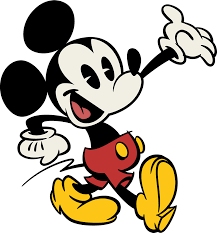

In [10]:
image = Image.open('image.png').convert('RGB')
image

In [11]:
simple_transform, train_transform = get_augmentations()

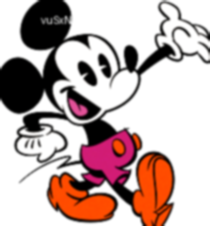

In [12]:
train_transform(image)

### model

In [13]:
encoder = EfficientNetB3Encoder(freeze=True)
preprocess = encoder.preprocess

Loaded pretrained weights for efficientnet-b3


In [14]:
tensor = preprocess(image).unsqueeze(0)
tensor.shape

torch.Size([1, 3, 224, 224])

In [10]:
encoder(tensor).shape

torch.Size([1, 1536])

In [9]:
encoder = CLIPEncoder(freeze=True)
preprocess = encoder.preprocess

In [14]:
tensor = preprocess(image).unsqueeze(0)
tensor.shape

torch.Size([1, 3, 224, 224])

In [11]:
encoder(tensor).shape

torch.Size([1, 512])

In [15]:
net = SiamNet()

Loaded pretrained weights for efficientnet-b3


In [16]:
net(tensor, tensor)

tensor([[0.5059]], grad_fn=<ViewBackward0>)

### Data

In [ ]:
import os

def count_images_in_directory(directory):
    # Список распространенных расширений файлов изображений
    image_extensions = [".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tiff", ".webp"]

    # Подсчет количества файлов с расширениями изображений
    image_count = 0
    for filename in os.listdir(directory):
        if any(filename.lower().endswith(ext) for ext in image_extensions):
            image_count += 1

    return image_count

# Пример использования
directory_path = "путь/к/вашей/директории"
num_images = count_images_in_directory(directory_path)
print(f"Количество изображений в директории: {num_images}")